In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler


import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("Employee.csv")  
print(df.head())
print(df.columns)

   Company   Age  Salary     Place Country  Gender
0      TCS  20.0     NaN   Chennai   India       0
1  Infosys  30.0     NaN    Mumbai   India       0
2      TCS  35.0  2300.0  Calcutta   India       0
3  Infosys  40.0  3000.0     Delhi   India       0
4      TCS  23.0  4000.0    Mumbai   India       0
Index(['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender'], dtype='object')


In [6]:
df.columns = ['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender']
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")
print(df.describe(include="all"))
print(df.dtypes)

Company: 6 unique values
Age: 29 unique values
Salary: 40 unique values
Place: 11 unique values
Country: 1 unique values
Gender: 2 unique values
       Company         Age       Salary   Place Country      Gender
count      140  130.000000   124.000000     134     148  148.000000
unique       6         NaN          NaN      11       1         NaN
top        TCS         NaN          NaN  Mumbai   India         NaN
freq        53         NaN          NaN      37     148         NaN
mean       NaN   30.484615  5312.467742     NaN     NaN    0.222973
std        NaN   11.096640  2573.764683     NaN     NaN    0.417654
min        NaN    0.000000  1089.000000     NaN     NaN    0.000000
25%        NaN   22.000000  3030.000000     NaN     NaN    0.000000
50%        NaN   32.500000  5000.000000     NaN     NaN    0.000000
75%        NaN   37.750000  8000.000000     NaN     NaN    0.000000
max        NaN   54.000000  9876.000000     NaN     NaN    1.000000
Company     object
Age        float64
S

In [7]:

df['Age'] = df['Age'].replace(0, np.nan)

print(df.isnull().sum())


df['Age'].fillna(df['Age'].median(), inplace=True)
df['Salary'].fillna(df['Salary'].median(), inplace=True)
df['Place'].fillna(df['Place'].mode()[0], inplace=True)
df['Company'].fillna(df['Company'].mode()[0], inplace=True)

# Remove duplicate rows

df = df.drop_duplicates()

# Handling Outliers (Using IQR)

Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1

# Remove extreme outliers (Salary)

df = df[(df['Salary'] >= (Q1 - 1.5 * IQR)) & (df['Salary'] <= (Q3 + 1.5 * IQR))]

print("Data after cleaning:")
print(df.info())

Company     8
Age        24
Salary     24
Place      14
Country     0
Gender      0
dtype: int64
Data after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  144 non-null    object 
 1   Age      144 non-null    float64
 2   Salary   144 non-null    float64
 3   Place    144 non-null    object 
 4   Country  144 non-null    object 
 5   Gender   144 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.9+ KB
None


     Company   Age  Salary      Place Country  Gender
21   Infosys  50.0  3184.0      Delhi   India       0
32   Infosys  45.0  4034.0   Calcutta   India       0
39   Infosys  41.0  3000.0     Mumbai   India       0
50   Infosys  41.0  3000.0    Chennai   India       0
57   Infosys  51.0  3184.0  Hyderabad   India       0
68   Infosys  43.0  4034.0     Mumbai   India       0
75   Infosys  44.0  3000.0     Cochin   India       0
86   Infosys  41.0  3000.0      Delhi   India       0
93   Infosys  54.0  3184.0     Mumbai   India       0
104  Infosys  44.0  4034.0      Delhi   India       0
122  Infosys  44.0  3234.0     Mumbai   India       0
129  Infosys  50.0  3184.0   Calcutta   India       0
138      CTS  44.0  3033.0     Cochin   India       0
140  Infosys  44.0  4034.0  Hyderabad   India       0
145  Infosys  44.0  4034.0      Delhi   India       1


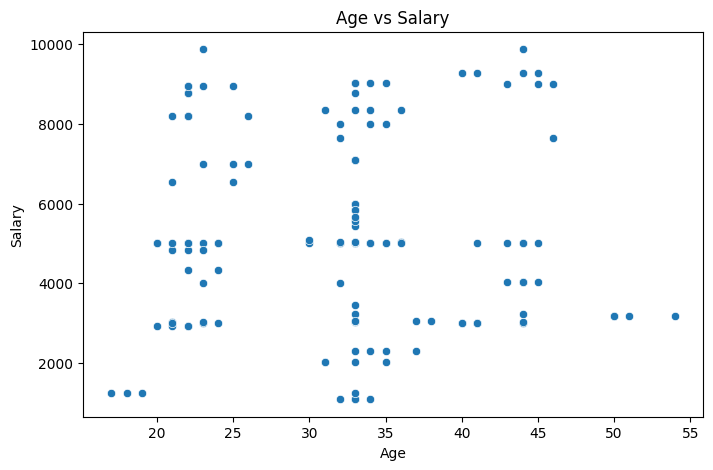

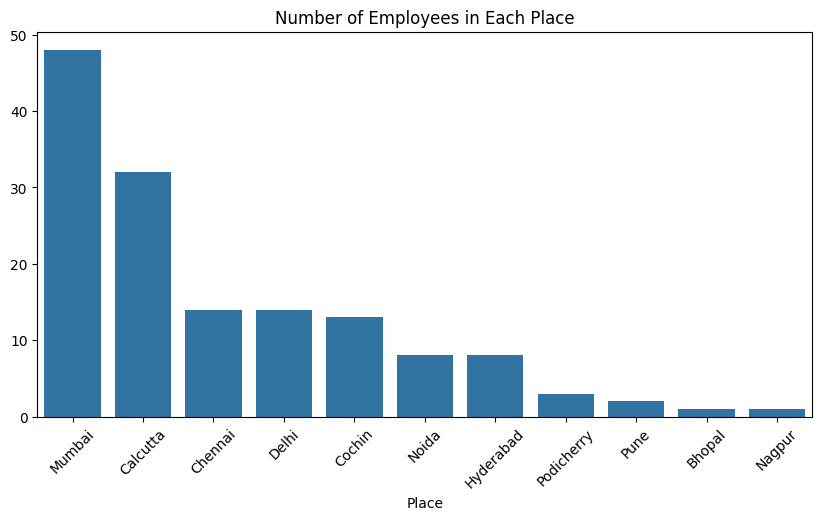

In [8]:
# Filter employees with Age > 40 and Salary < 5000
filtered_df = df[(df['Age'] > 40) & (df['Salary'] < 5000)]
print(filtered_df)

# Plot Age vs Salary
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Salary', data=df)
plt.title("Age vs Salary")
plt.show()

# Count employees per place
place_counts = df['Place'].value_counts()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=place_counts.index, y=place_counts.values)
plt.xticks(rotation=45)
plt.title("Number of Employees in Each Place")
plt.show()

In [9]:

label_enc = LabelEncoder()
df['Company'] = label_enc.fit_transform(df['Company'])
df['Place'] = label_enc.fit_transform(df['Place'])
df['Country'] = label_enc.fit_transform(df['Country'])
df['Gender'] = df['Gender'].astype(int)  # Ensure Gender is int
print(df.head())

   Company   Age  Salary  Place  Country  Gender
0        4  20.0  5000.0      2        0       0
1        2  30.0  5000.0      6        0       0
2        4  35.0  2300.0      1        0       0
3        2  40.0  3000.0      4        0       0
4        4  23.0  4000.0      6        0       0


In [10]:
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Apply scaling
df[['Age', 'Salary']] = standard_scaler.fit_transform(df[['Age', 'Salary']])
df[['Age', 'Salary']] = minmax_scaler.fit_transform(df[['Age', 'Salary']])

print("Data after scaling:")
print(df.head())

Data after scaling:
   Company       Age    Salary  Place  Country  Gender
0        4  0.081081  0.445089      2        0       0
1        2  0.351351  0.445089      6        0       0
2        4  0.486486  0.137817      1        0       0
3        2  0.621622  0.217480      4        0       0
4        4  0.162162  0.331285      6        0       0
